In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import interpolate 

In [2]:
# Flux files
fnueFlux = '/Users/yuntse/work/sns/SNS_LAr/Neutrino_info/SNS-electronNeutrino-flux.csv'
fanumuFlux = '/Users/yuntse/work/sns/SNS_LAr/Neutrino_info/SNS-antimuonneutrino-flux.csv'

In [3]:
# Load the fluxes
nueFlux = pd.read_csv(fnueFlux, header = None, names = ['E', 'Rate'])
anumuFlux = pd.read_csv(fanumuFlux, header = None, names = ['E', 'Rate'])
numuFlux = {}
numuFlux['E'] = np.array([29.8, 30, 30.2])
numuFlux['Rate'] = np.array([0, 4700*1e6, 0])

In [4]:
# Interpolate the fluxes
nue = interpolate.interp1d(nueFlux['E'], nueFlux['Rate'], kind = 'linear', bounds_error = False, fill_value = (0, 0))
anumu = interpolate.interp1d(anumuFlux['E'], anumuFlux['Rate'], kind = 'linear', bounds_error = False, fill_value = (0, 0))
numu = interpolate.interp1d(numuFlux['E'], numuFlux['Rate'], kind = 'linear', bounds_error = False, fill_value = (0, 0))

In [5]:
# Integration step
E = np.linspace(0., 100., num = 500, endpoint = False)
DeltaE = 100./500.

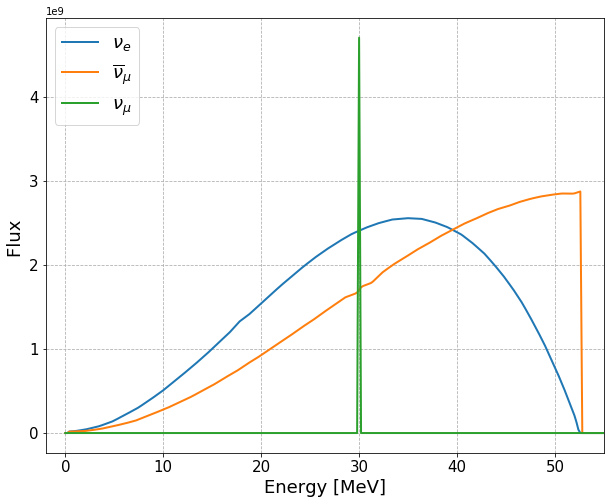

In [6]:
# Sanity check on flux
plt.figure(figsize = (10,8))
plt.plot(E, nue(E), label = r'$\nu_e$', lw = 2)
plt.plot(E, anumu(E), label = r'$\overline{\nu}_\mu$', lw = 2)
plt.plot(E, numu(E), label = r'$\nu_{\mu}$', lw = 2)

plt.legend(loc = 'upper left', ncol = 1, fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.grid(which = "both", linestyle = '--')
plt.xlabel('Energy [MeV]', fontsize = 18)
plt.ylabel(r'Flux ', fontsize = 18)

plt.xlim(-2, 55)
plt.show()

In [7]:
# Cross section files
fXSNueAr40Marley = '/Users/yuntse/work/supernova/SNOwGLoBES/xscns/xs_nue_Ar40_marley.dat'
fXSNuE = '/Users/yuntse/work/supernova/SNOwGLoBES/xscns/xs_nue_e.dat'

In [8]:
# Load the cross sections
XSNueAr40Marley = pd.read_csv( fXSNueAr40Marley, header = None, sep = r'\s+', names = ['E', 'nu_e', 'nu_mu', 'nu_tau', 'nu_e_bar', 'nu_mu_bar', 'nu_tar_bar'])
XSNuE = pd.read_csv( fXSNuE, header = None, skiprows = 3, sep = r'\s+', names = ['E', 'nu_e', 'nu_mu', 'nu_tau', 'nu_e_bar', 'nu_mu_bar', 'nu_tau_bar'])
XSNuE

,E,nu_e,nu_mu,nu_tau,nu_e_bar,nu_mu_bar,nu_tau_bar
0,-3.301030,0.000560,0.000139,0.000138,0.000285,0.000128,0.000129
1,-3.298729,0.000561,0.000140,0.000138,0.000285,0.000128,0.000129
2,-3.296428,0.000562,0.000140,0.000138,0.000285,0.000128,0.000129
3,-3.294127,0.000563,0.000140,0.000139,0.000286,0.000128,0.000129
4,-3.291826,0.000565,0.000140,0.000139,0.000286,0.000128,0.000129
...,...,...,...,...,...,...,...
996,-1.009204,0.000918,0.000158,0.000157,0.000386,0.000135,0.000137
997,-1.006903,0.000918,0.000158,0.000157,0.000386,0.000135,0.000137
998,-1.004602,0.000918,0.000158,0.000157,0.000386,0.000135,0.000137
999,-1.002301,0.000918,0.000158,0.000157,0.000386,0.000135,0.000137


In [9]:
# The unit of the cross section in cm^2
FAC = 1e-38

In [10]:
# Interpolate the cross sections
XSNueAr40Marley['E'] = 10**XSNueAr40Marley['E']
XSNueAr40Marley['nu_e'] *= XSNueAr40Marley['E']
XSectNueAr40MarleyFunc = interpolate.interp1d(XSNueAr40Marley['E']*1000, XSNueAr40Marley['nu_e'], kind = 'linear', bounds_error = False, fill_value = (0, 0))
XSNuE['E'] = 10**XSNuE['E']
XSNuE['nu_e'] *= XSNuE['E']
XSNueEFunc = interpolate.interp1d(XSNuE['E']*1000, XSNuE['nu_e'], kind = 'linear', bounds_error = False, fill_value = (0, 0))
XSNuE['nu_mu'] *= XSNuE['E']
XSNumuEFunc = interpolate.interp1d(XSNuE['E']*1000, XSNuE['nu_mu'], kind = 'linear', bounds_error = False, fill_value = (0, 0))
XSNuE['nu_mu_bar'] *= XSNuE['E']
XSNumubarEFunc = interpolate.interp1d(XSNuE['E']*1000, XSNuE['nu_mu_bar'], kind = 'linear', bounds_error = False, fill_value = (0, 0))

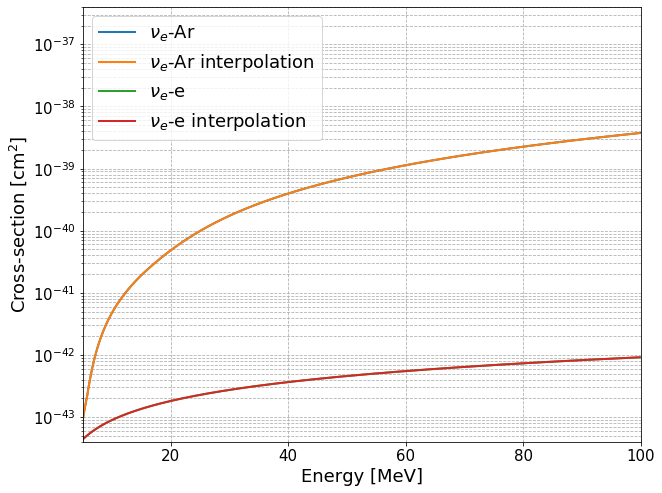

In [11]:
# Sanity check on cross sections
plt.figure(figsize = (10,8))
plt.plot(XSNueAr40Marley['E']*1000, XSNueAr40Marley['nu_e']*FAC, label = r'$\nu_e$-Ar', lw = 2)
plt.plot(E, XSectNueAr40MarleyFunc(E)*FAC, label = r'$\nu_e$-Ar interpolation', lw = 2)
plt.plot(XSNuE['E']*1000, XSNuE['nu_e']*FAC, label = r'$\nu_e$-e', lw = 2)
plt.plot(E, XSNueEFunc(E)*FAC, label = r'$\nu_e$-e interpolation', lw = 2)

plt.legend(loc = 'upper left', ncol = 1, fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.grid(which = "both", linestyle = '--')
plt.xlabel('Energy [MeV]', fontsize = 18)
plt.ylabel(r'Cross-section [cm$^2$]', fontsize = 18)

plt.semilogy()
plt.xlim(5, 100)
plt.ylim(4e-44, 4e-37)
plt.show()

In [12]:
# Convolve fluxes and cross sections
NueAr40 = np.array([ nue(e)*XSectNueAr40MarleyFunc(e)*FAC for e in E ])
NueE = np.array([ nue(e)*XSNueEFunc(e)*FAC for e in E ])
NumuE = np.array([ numu(e)*XSNumuEFunc(e)*FAC for e in E ])
NumubarE = np.array([ anumu(e)*XSNumubarEFunc(e)*FAC for e in E ])

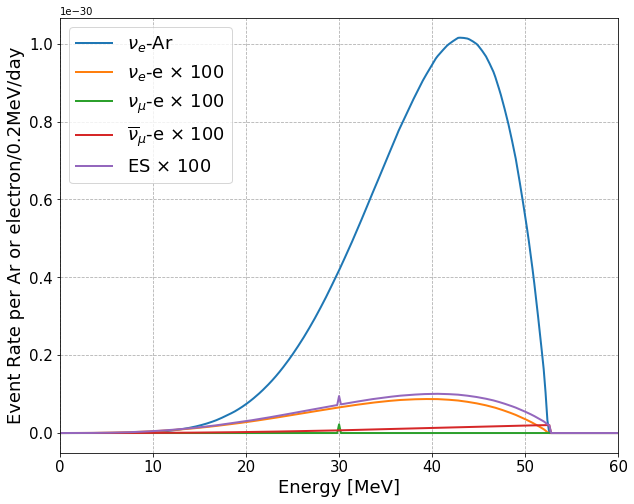

In [13]:
# Sanity check on flux convolved with cross sections
plt.figure(figsize = (10,8))
plt.plot(E, NueAr40, label = r'$\nu_e$-Ar', lw = 2)
plt.plot(E, NueE*100, label = r'$\nu_e$-e $\times$ 100', lw = 2)
plt.plot(E, NumuE*100, label = r'$\nu_{\mu}$-e $\times$ 100', lw = 2)
plt.plot(E, NumubarE*100, label = r'$\overline{\nu}_{\mu}$-e $\times$ 100', lw = 2)
plt.plot(E, (NueE+NumuE+NumubarE)*100, label = r'ES $\times$ 100', lw = 2)

plt.legend(loc = 'upper left', ncol = 1, fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.grid(which = "both", linestyle = '--')
plt.xlabel('Energy [MeV]', fontsize = 18)
plt.ylabel('Event Rate per Ar or electron/0.2MeV/day', fontsize = 18)

plt.xlim(0, 60)
plt.show()

In [14]:
# Constants for Ar
# density in g/cm^3
density = 1.3954
# Atomic mass
A = 39.95
# Atomic number
Z = 18
# Avogadro constant
NA = 6.02214076e23

In [15]:
# Size of the detector in cm^3
Vdetector = 100.*100.*100.
# Duration in days
duration = 365.
# Mass of detector in gram
# Mdetector = Vdetector* density
Mdetector = 1e6
# Number of argon atoms
nAr = Mdetector*NA/A
nAr

1.507419464330413e+28

In [16]:
# Event rate
nTotalNueAr40 = np.sum(NueAr40)
nTotalNueAr40 *= nAr*duration
# For nue-e, need to multiply by the atomic number of Ar = number of electrons per Ar
nTotalNueE = np.sum(NueE)
nTotalNueE *= Z*nAr*duration
nTotalNumuE = np.sum(NumuE)
nTotalNumuE *= Z*nAr*duration
nTotalNumubarE = np.sum(NumubarE)
nTotalNumubarE *= Z*nAr*duration
print ('Total nue-Ar events per %f tonnes per %d days: %f' % ( Mdetector/1e6, duration, nTotalNueAr40 ))
print ('Total nue-e events per %f tonnes per %d days: %f' % ( Mdetector/1e6, duration, nTotalNueE ))
print ('Total numu-e events per %f tonnes per %d days: %f, caveat: this number needs to be updated with more details of the numu flux.' % ( Mdetector/1e6, duration, nTotalNumuE))
print ('Total numubar-e events per %f tonnes per %d days: %f' % ( Mdetector/1e6, duration, nTotalNumubarE))
print ('Total elastic scattering events per %f tonnes per %d days: %f' % ( Mdetector/1e6, duration, nTotalNueE + nTotalNumuE + nTotalNumubarE))

Total nue-Ar events per 1.000000 tonnes per 365 days: 530.737836
Total nue-e events per 1.000000 tonnes per 365 days: 10.793672
Total numu-e events per 1.000000 tonnes per 365 days: 0.022130, caveat: this number needs to be updated with more details of the numu flux.
Total numubar-e events per 1.000000 tonnes per 365 days: 1.867855
Total elastic scattering events per 1.000000 tonnes per 365 days: 12.683657


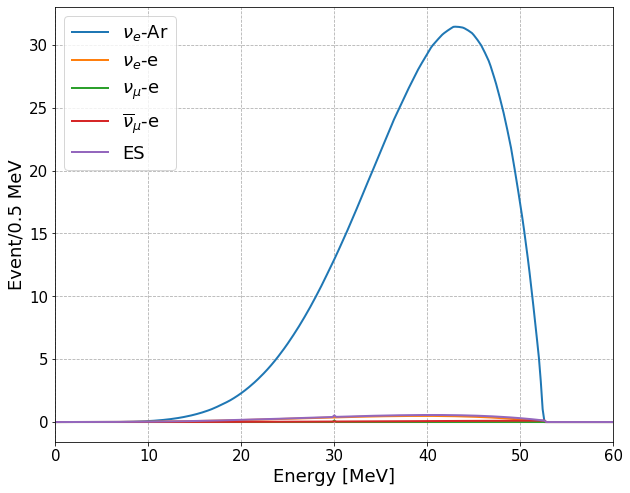

In [17]:
# Compare to Fig. 11 of arXiv:1211.5199
# Note our flux histograms are made per 0.2 MeV at 30m from the target, while Fig. 11 is made per 0.5 MeV at 20m from the target.
# Scale
rToCompare = 0.5*9/(0.2*4)
plt.figure(figsize = (10,8))
plt.plot(E, NueAr40*nAr*duration*rToCompare, label = r'$\nu_e$-Ar', lw = 2)
plt.plot(E, NueE*Z*nAr*duration*rToCompare, label = r'$\nu_e$-e', lw = 2)
plt.plot(E, NumuE*Z*nAr*duration*rToCompare, label = r'$\nu_\mu$-e', lw = 2)
plt.plot(E, NumubarE*Z*nAr*duration*rToCompare, label = r'$\overline{\nu}_\mu$-e', lw = 2)
plt.plot(E, (NueE+NumuE+NumubarE)*Z*nAr*duration*rToCompare, label = 'ES', lw = 2)

plt.legend(loc = 'upper left', ncol = 1, fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.grid(which = "both", linestyle = '--')
plt.xlabel('Energy [MeV]', fontsize = 18)
plt.ylabel('Event/0.5 MeV', fontsize = 18)

plt.xlim(0, 60)
plt.show()